In [33]:
import numpy as np
import tensorflow as tf
import tensorflowjs as tfjs
from lib.mnist_aug.mnist_augmenter import DataManager, MNISTAug

In [2]:
aug = MNISTAug()
aug.min_objects = 1
aug.max_objects = 1

In [3]:
dm = DataManager()
dm.load()

In [18]:
x_train, y_train = aug.get_augmented(dm.x_train, dm.y_train, 50000)
x_test, y_test = aug.get_augmented(dm.x_test, dm.y_test, 200)

/Users/akhildevarashetti/code/ml_gallery/ml_py/venv/lib/python3.8/site-packages/skimage/transform/_warps.py:115: RuntimeWarning: divide by zero encountered in true_divide
  factors = (np.asarray(input_shape, dtype=float) /


cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert f

In [21]:
x_train = x_train.reshape(-1, 1, 112, 112)
x_test = x_test.reshape(-1, 1, 112, 112)

[{'class': 9,
  'class_one_hot': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  'x1': 3,
  'y1': 56,
  'x2': 41,
  'y2': 94,
  'cx': 22.0,
  'cy': 75.0,
  'height': 38,
  'width': 38}]

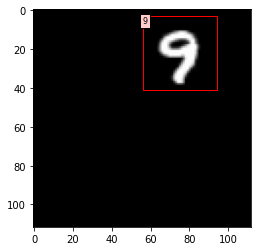

In [22]:
DataManager.plot_num(x_train[1].reshape((112, 112)), y_train[1])
y_train[1]

In [23]:
anchor_cx = 56
anchor_cy = 56
anchor_w = 28

In [24]:
def units_to_diff(y):
    y_d = []
    for i in range(len(y)):
        cx_d = (y[i][0]['cx'] - anchor_cx) / 112
        cy_d = (y[i][0]['cy'] - anchor_cy) / 112
        w_d = (y[i][0]['width'] - anchor_w) / 112
        y_d.append((cx_d, cy_d, w_d))
    return np.array(y_d)

def diff_to_units(y):
    y_units = []
    for i in range(len(y)):
        cx_d = y[i][0] * 112 + anchor_cx
        cy_d = y[i][1] * 112 + anchor_cy
        wd = y[i][2] * 112 + anchor_w
        y_units.append((cx_d, cy_d, wd))
    return np.array(y_units)

In [25]:
print(y_test[:2])
y_d_test = units_to_diff(y_test)
print(y_d_test[:2])
y_d_unwrapped = diff_to_units(y_d_test)
print(y_d_unwrapped[:2])

[[{'class': 3, 'class_one_hot': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), 'x1': 85, 'y1': 54, 'x2': 112, 'y2': 89, 'cx': 98.5, 'cy': 71.5, 'height': 35, 'width': 27}], [{'class': 5, 'class_one_hot': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), 'x1': 8, 'y1': 89, 'x2': 38, 'y2': 112, 'cx': 23.0, 'cy': 100.5, 'height': 23, 'width': 30}]]
[[ 0.37946429  0.13839286 -0.00892857]
 [-0.29464286  0.39732143  0.01785714]]
[[ 98.5  71.5  27. ]
 [ 23.  100.5  30. ]]


In [26]:
y_d = units_to_diff(y_train)
y_d_test = units_to_diff(y_test)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='tanh')
])
model.compile(optimizer='adam', loss='MSE', metrics=['accuracy'])

In [27]:
epochs = 20
batch_size = 100

model.fit(x_train, y_d, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_d_test))

Epoch 1/20
500/500 [==============================] - 55s 110ms/step - loss: 6.7344e-04 - accuracy: 0.9499 - val_loss: 2.9381e-04 - val_accuracy: 0.9650

KeyboardInterrupt: 

y_pred[:2]=array([[ 0.3799817 ,  0.14382441, -0.0071304 ],
       [-0.2999372 ,  0.4150653 ,  0.0118895 ]], dtype=float32)
y_d_test[:2]=array([[ 0.37946429,  0.13839286, -0.00892857],
       [-0.29464286,  0.39732143,  0.01785714]])
[{'x1': 61.101633474230766, 'y1': 3.7679647654294968, 'x2': 86.55741365253925, 'y2': 29.223744943737984}]
[{'class': 4, 'class_one_hot': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), 'x1': 59, 'y1': 1, 'x2': 87, 'y2': 29, 'cx': 73.0, 'cy': 15.0, 'height': 28, 'width': 28}]
[{'x1': 82.2170261144638, 'y1': 21.955251336097717, 'x2': 108.84292089939117, 'y2': 48.581146121025085}]
[{'class': 2, 'class_one_hot': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), 'x1': 83, 'y1': 20, 'x2': 111, 'y2': 48, 'cx': 97.0, 'cy': 34.0, 'height': 28, 'width': 28}]


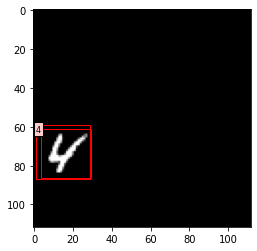

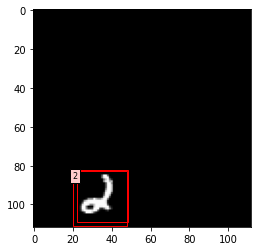

In [29]:
y_pred = model.predict(x_test)

print(f'{y_pred[:2]=}\n{y_d_test[:2]=}')

y_pred = diff_to_units(y_pred)
for i in range(2):
    i = i+8

    cx_pred, cy_pred, w_pred = y_pred[i]
    pred_boxes = [{
        'x1': float(cx_pred - w_pred / 2),
        'y1': float(cy_pred - w_pred / 2),
        'x2': float(cx_pred + w_pred / 2),
        'y2': float(cy_pred + w_pred / 2)
    }]

    # pred_boxes.extend(list(y_test[i]))
    print(f'{pred_boxes}')
    print(y_test[i])

    DataManager.plot_num(x_test[i].reshape((112, 112)), pred_boxes + y_test[i])


In [30]:
print(y_test[0])
print(y_d_test[0])


[{'class': 3, 'class_one_hot': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), 'x1': 85, 'y1': 54, 'x2': 112, 'y2': 89, 'cx': 98.5, 'cy': 71.5, 'height': 35, 'width': 27}]
[ 0.37946429  0.13839286 -0.00892857]


[{'x1': 42.0, 'y1': 42.0, 'x2': 70.0, 'y2': 70.0}]
56 56 28


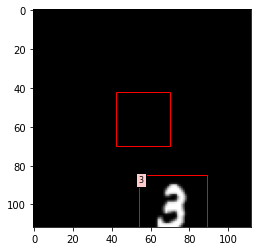

In [31]:
anchor = [{
        'x1': float(anchor_cx - anchor_w / 2),
        'y1': float(anchor_cy - anchor_w / 2),
        'x2': float(anchor_cx + anchor_w / 2),
        'y2': float(anchor_cy + anchor_w / 2)
    }]

print(anchor)
print(anchor_cx, anchor_cy, anchor_w,)

DataManager.plot_num(x_test[0].reshape((112,112)), y_test[0] + anchor)

In [34]:
tfjs.converters.save_keras_model(model, '../../../../ml_gatsby/src/lib/vision/find_char/model')


/Users/akhildevarashetti/code/ml_gallery/ml_py/venv/lib/python3.8/site-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
